In [1]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  #设定初始值

In [2]:
def forward(x):
    return x * w

In [3]:
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y) ** 2
    return cost / len(xs)

In [4]:
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2 * x * (x * w - y)
    return grad / len(xs)
#此处gradient的计算公式由前文MSE公式求导得到

In [5]:
epoch_list = []
loss_list = []

print('Predict (before training)', 4, forward(4))
for epoch in range(100):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)     #gradient是与w相关的，每迭代出一个新的w后重新对gradient进行计算
    w -= 0.01 * grad_val                    #设定0.01为学习率，对w进行迭代
    print('Epoch:', epoch, 'w=', w, 'loss=', cost_val)
    epoch_list.append(epoch)
    loss_list.append(cost_val)
print('Predict (after training)', 4, forward(4))

Predict (before training) 4 4.0
Epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
Epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
Epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
Epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
Epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
Epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
Epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
Epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
Epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
Epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
Epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
Epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
Epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
Epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
Epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
Epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
Epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
Epoch: 17 w= 

**SGC (Stochastic Gradient Descent)**

随机梯度下降SGD不使用整个dataset计算gradient, 而是使用一个随机样本计算
这样做与一般的Gradient Descent有所不同：

*收敛速度*： 对于大型数据集，SGD 的收敛速度通常比批量梯度下降快得多，因为它更新权重的频率更高

*噪声的引入*： SGD 将噪声引入学习过程，这有助于逃避局部最小值（以及鞍点），但也可能意味着损失函数更加不稳定，可能无法收敛到精确的最小值。

下方代码框给出了改为SGD的迭代代码，其中gradient函数与之前发生了变化

**然而，只选一个变量进行计算时间复杂度是很差的，而用整个dataset进行计算性能太低，所以人们提出了一个折中的方案，叫做batch，即把dataset分为很多的小块，这是目前SGD的默认方案**

In [6]:
# for epoch in range(100):
#     for i in range(len(x_data)):
#         x = x_data[i]
#         y = y_data[i]
#         # Compute the gradient for this single data point or batch
#         grad_val = gradient(x, y)     #gradient的参数类型由list变为了单一数据
#         w -= 0.01 * grad_val
#         # Optionally, record the cost and update the epoch and loss lists


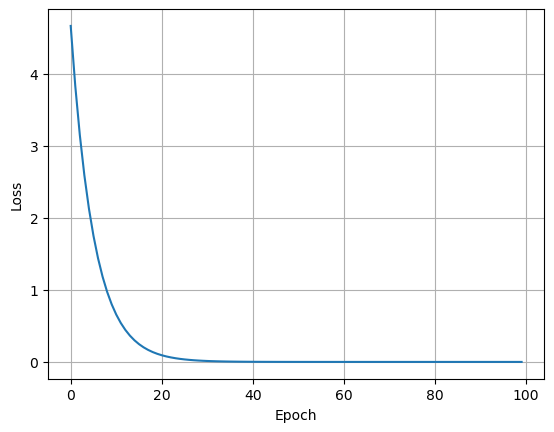

: 

In [7]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()  #网格线

plt.show()